## Data Cleaning and Data Preparation

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
os.chdir(os.environ['USERPROFILE'] + r"\UQR Thoughtful Learning")

import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices

#d = 1
dt = pd.read_csv('Covid-19-UK.csv', index_col=0) #specifying 1st column as row labels (called 'index')
#handle special variabes
#del dt['random_index'] #variables to exclude
dt.columns = dt.columns.str.replace(' ','_').str.lower()
print(dt.columns)
yname = 'cumdailynsodeathsbydeathdate' #target variable

Index(['cumcasesbypublishdate', 'cumvirustests',
       'cumdailynsodeathsbydeathdate',
       'cumpeoplevaccinatedcompletebypublishdate', 'cumadmissions',
       'ftse100_open_price', 'close_price', 'high_price', 'low_price',
       'volume', 'temperature_max_degc', 'tmin_degc', 'rain_mm', 'sun_hours',
       'u.s._cases', 'u.s._deaths',
       'https://coronavirus.data.gov.uk/details/download'],
      dtype='object')


In [3]:
dt.drop(columns = ["https://coronavirus.data.gov.uk/details/download"], inplace = True)
#Dropping useless col

dt.dropna(subset = [yname], inplace = True) # Removing NA data which does not contain the dependent value
dt = dt.iloc[1:]

dt[["cumvirustests", "ftse100_open_price", "cumdailynsodeathsbydeathdate", "cumadmissions", "u.s._cases", "u.s._deaths", "close_price", "high_price", "low_price", "volume", "temperature_max_degc", "tmin_degc", "rain_mm", "sun_hours"]] = dt[["cumvirustests", "ftse100_open_price", "cumdailynsodeathsbydeathdate", "cumadmissions", "u.s._cases", "u.s._deaths", "close_price", "high_price", "low_price", "volume", "temperature_max_degc", "tmin_degc", "rain_mm", "sun_hours"]].fillna(method = "ffill")
#Forward fill of missing values

dt[["cumvirustests", "ftse100_open_price", "cumdailynsodeathsbydeathdate", "cumpeoplevaccinatedcompletebypublishdate", "cumadmissions", "u.s._cases", "u.s._deaths", "close_price", "high_price", "low_price", "volume"]] = dt[["cumvirustests", "ftse100_open_price", "cumdailynsodeathsbydeathdate", "cumpeoplevaccinatedcompletebypublishdate", "cumadmissions", "u.s._cases", "u.s._deaths", "close_price", "high_price", "low_price", "volume"]].fillna(value = 0)
#Filling rest of values with 0

initialdt = dt
dt #Cleaning is completed by this stage



,cumcasesbypublishdate,cumvirustests,cumdailynsodeathsbydeathdate,cumpeoplevaccinatedcompletebypublishdate,cumadmissions,ftse100_open_price,close_price,high_price,low_price,volume,temperature_max_degc,tmin_degc,rain_mm,sun_hours,u.s._cases,u.s._deaths
date,,,,,,,,,,,,,,,,
2020-01-31,2.0,0.0,1.0,0.0,0.0,7381.96,7286.01,7398.34,7275.03,6.806234e+08,10.1,4.2,109.0,53.3,7.0,0.0
2020-02-01,2.0,0.0,1.0,0.0,0.0,7381.96,7286.01,7398.34,7275.03,6.806234e+08,10.1,4.2,109.0,53.3,8.0,0.0
2020-02-02,2.0,0.0,2.0,0.0,0.0,7381.96,7286.01,7398.34,7275.03,6.806234e+08,10.1,4.2,109.0,53.3,11.0,0.0
2020-02-03,2.0,0.0,2.0,0.0,0.0,7286.01,7326.31,7359.98,7285.16,6.250598e+08,10.1,4.2,109.0,53.3,11.0,0.0
2020-02-04,2.0,0.0,2.0,0.0,0.0,7326.31,7439.82,7442.08,7326.31,6.473267e+08,10.1,4.2,109.0,53.3,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,4263527.0,104422879.0,149778.0,1663646.0,452720.0,6761.47,6749.70,6804.91,6723.67,6.543759e+08,9.5,2.9,68.0,54.5,29519341.0,535227.0
2021-03-16,4268821.0,105849755.0,149881.0,1759445.0,453160.0,6749.70,6803.61,6812.78,6749.64,8.333579e+08,9.5,2.9,68.0,54.5,29573782.0,536472.0
2021-03-17,4274579.0,107584947.0,149983.0,1879054.0,453606.0,6803.61,6762.67,6805.73,6753.82,8.270661e+08,9.5,2.9,68.0,54.5,29632723.0,537649.0


## Selection of appropriate x and y variables

In [28]:
import time
stm = time.time()
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import xgboost
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

yname = 'cumdailynsodeathsbydeathdate'
xnames = ['cumcasesbypublishdate','cumvirustests','cumadmissions','u.s._cases','u.s._deaths']
cols = xnames + [yname]
d = initialdt[cols].select_dtypes(include='number').dropna(axis=0)

X = d[xnames]
y = d[yname]

print("Regress '" + y.name + "' on", list(X),'\n')

#split into training & testing sets

Regress 'cumdailynsodeathsbydeathdate' on ['cumcasesbypublishdate', 'cumvirustests', 'cumadmissions', 'u.s._cases', 'u.s._deaths'] 



In [29]:
data_dmatrix = xgboost.DMatrix(data=X,label=y)
#forming datamatrix in xgboost's favoured format 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#splitting into train and test data

In [30]:
#defining base model
model = XGBRegressor(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8, 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluating model using repeated k-fold cross validation
scores = cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
#force scores to be positive
scores = np.absolute(scores)
print('Mean Median Absolute Error: %.3f (%.3f)' % (scores.mean(), scores.std()) )
#mean MAE and standard dev of MAE
print(scores)
#showing MAE for all CV runs

Mean Median Absolute Error: 83.394 (42.462)
[ 33.25064087  89.19140625  58.67578125  37.359375    85.09375
  98.0703125  117.96112061  72.421875    59.22265625 189.39453125
  84.234375    62.64344788  46.8515625   59.8359375   69.7578125
 167.625       66.8515625  126.8125      24.78125     71.45703125
  46.35546875  24.203125   104.828125    46.94921875 187.875
 105.7265625   87.90625     76.48828125 126.65625     73.3359375 ]


In [31]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#fitting and predicting w model

In [32]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
r2_test = r2_score(y_test,y_pred)
print('R² of y test against y predict =', r2_test)
mae = median_absolute_error(y_test, y_pred)
print('Median absolute error of y test against y predict =', mae)

The root mean squared error (RMSE) on test set: 503.0514
R² of y test against y predict = 0.9998501078751106
Median absolute error of y test against y predict = 72.4921875


In [33]:
#hyperparameter tuning
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.01, 0.05, 0.1], #so called `eta` value
              'max_depth': [12, 13, 14, 15],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.4, 0.5, 0.6],
              'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
              'n_estimators': [5000, 10000, 15000],
              'gamma': [0, 1, 5]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        scoring='neg_median_absolute_error',
                        verbose=True)
#using GridSearch with CV as evaluation, to select best hyperparameterse for XGB regression

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
#prints the best score and parameters
#do not run this cell on subsequent runs, takes damn long lol 

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 50.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 64.3min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 100.6min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 120.7min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 129.3min finished


-65.43973655700684
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 15, 'min_child_weight': 4, 'n_estimators': 5000, 'silent': 1, 'subsample': 0.5}


In [34]:
#further tuning with MAE scoring
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.01], #so called `eta` value
              'max_depth': [10, 11, 12],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.5],
              'colsample_bytree': [0.8],
              'n_estimators': [4000, 5000, 6000],
              'gamma': [0]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        n_jobs = -1,
                        verbose=True,
                        scoring='neg_median_absolute_error')
#using GridSearch with CV as evaluation, to select best hyperparameters for XGB regression

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
#prints the best score and parameters
#do not run this cell on subsequent runs, takes damn long lol 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   21.7s finished


-69.699609375
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 11, 'min_child_weight': 4, 'n_estimators': 6000, 'silent': 1, 'subsample': 0.5}


In [35]:
model_best = XGBRegressor(colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=6000, silent=1, subsample=0.5)
#running model with best hyperparameterse


scores = cross_val_score(model_best, X_train, y_train, scoring='neg_median_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
print(scores)

Mean MAE: 73.624 (43.788)
[ 46.98828125  55.91796875  33.546875    36.734375    41.90625
  85.8125      67.125       51.8046875   66.84375    144.2421875
  71.5078125   60.109375   111.71484375  53.5078125   63.4609375
 209.68359375  65.5625     132.1796875   33.203125    69.578125
  64.75        22.75       115.28125     47.234375   188.73828125
  65.7109375   52.609375    66.4296875   49.09375     34.703125  ]


In [36]:
model_best.fit(X_train, y_train)
y_pred_best = model_best.predict(X_test)

In [37]:
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print("The root mean squared error (RMSE) on test set: {:.4f}".format(rmse_best))
r2_test_best = r2_score(y_test,y_pred_best)
print('R² of y test against y predict =', r2_test_best)
mae_best = median_absolute_error(y_test, y_pred_best)
print('Median absolute error of y test against y predict =', mae_best)

The root mean squared error (RMSE) on test set: 262.4308
R² of y test against y predict = 0.9999592071962834
Median absolute error of y test against y predict = 74.173828125


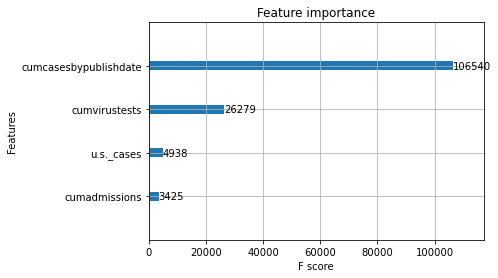

In [38]:
xgboost.plot_importance(model_best)
plt.show()

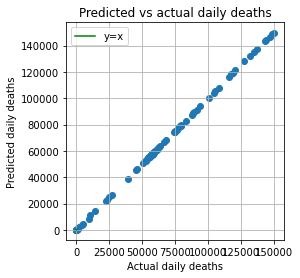

In [39]:
plt.scatter(y=y_pred_best, x=y_test)
plt.title('Predicted vs actual daily deaths')
plt.ylabel('Predicted daily deaths')
plt.xlabel('Actual daily deaths')

lineStart = 0
lineEnd = 600
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'g', label='y=x')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.axis('square')
plt.grid()
plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = [6.000, 6.145] # for square plot
# height for scrollable output window below program lines: